In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

C:\Users\DELL G5\AppData\Local\Temp\ipykernel_21752\4283726062.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [29]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [30]:
tips = sns.load_dataset('tips')
tips.shape

(244, 7)

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


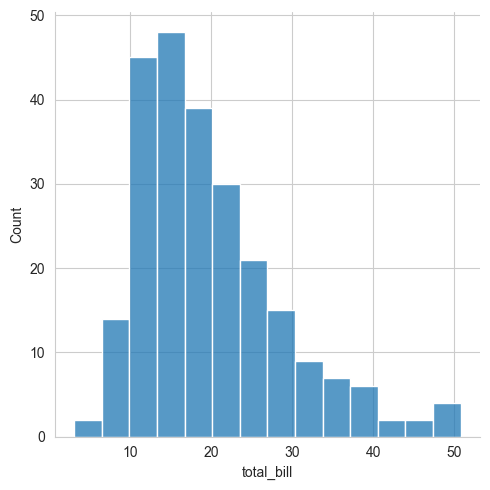

In [32]:
sns.displot(tips['total_bill'])

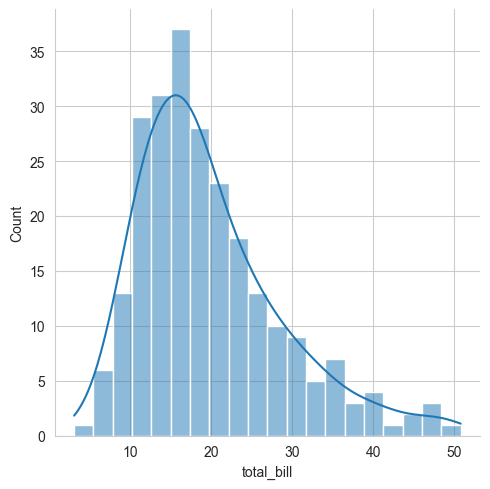

In [33]:
sns.displot(tips['total_bill'], bins=20, kde=True)

In [34]:
tb_min = min(tips['total_bill'])
tb_min

3.07

In [35]:
tb_max = max(tips['total_bill'])
tb_max

50.81

In [36]:
bars = np.linspace(tb_min, tb_max, 6)
bars

array([ 3.07 , 12.618, 22.166, 31.714, 41.262, 50.81 ])

In [37]:
total_bill = tips['total_bill']
bar1 = total_bill[(total_bill >= bars[0]) & (total_bill < bars[1])]
bar2 = total_bill[(total_bill >= bars[1]) & (total_bill < bars[2])]
print(len(bar1), len(bar2))

49 119


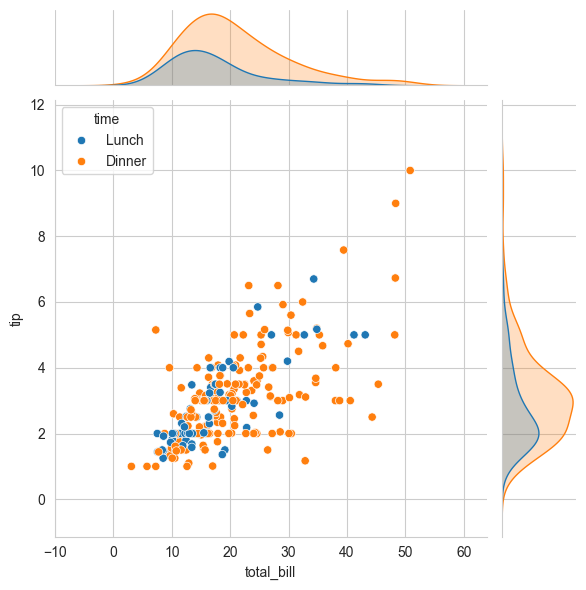

In [38]:
sns.jointplot(x='total_bill', y='tip', data=tips, hue='time')

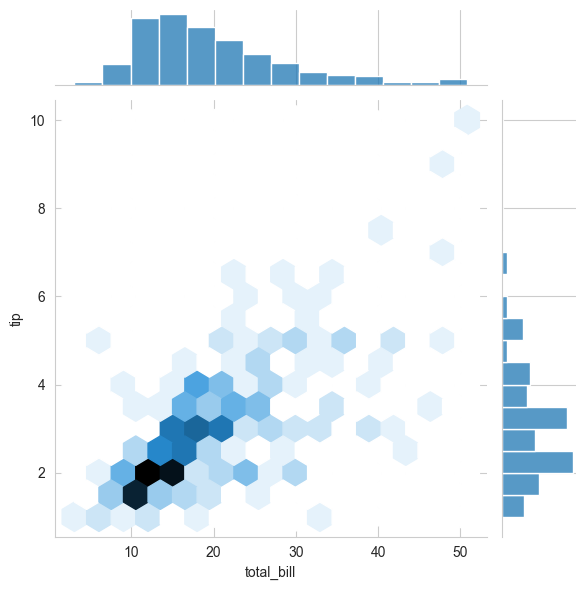

In [39]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

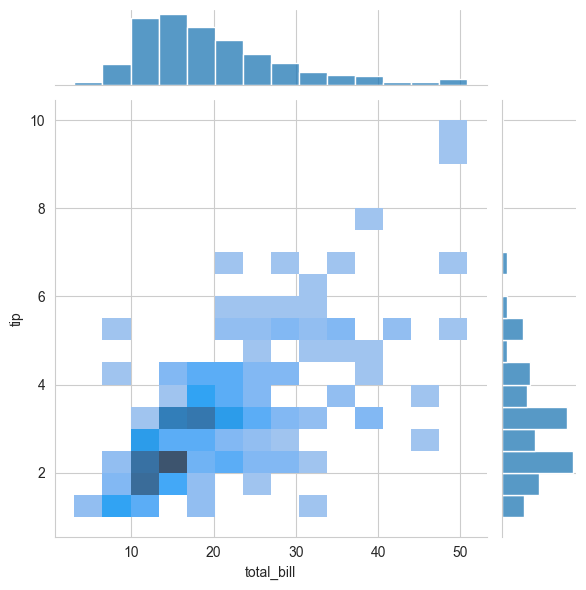

In [40]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hist')

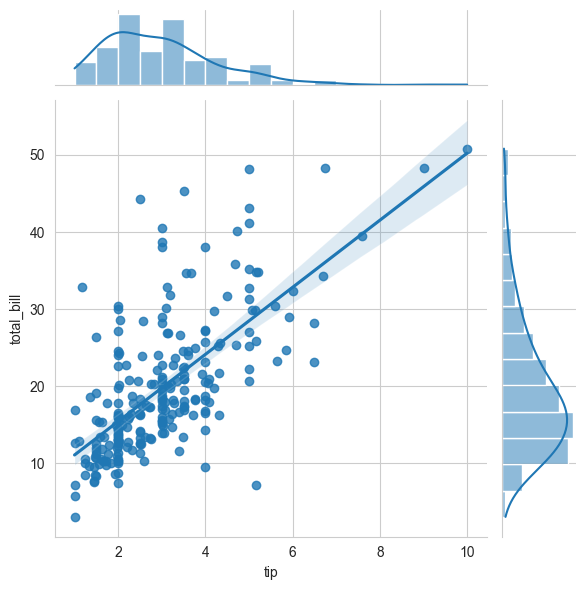

In [41]:
sns.jointplot(x='tip', y='total_bill', data=tips, kind='reg')

<Axes: xlabel='total_bill', ylabel='tip'>

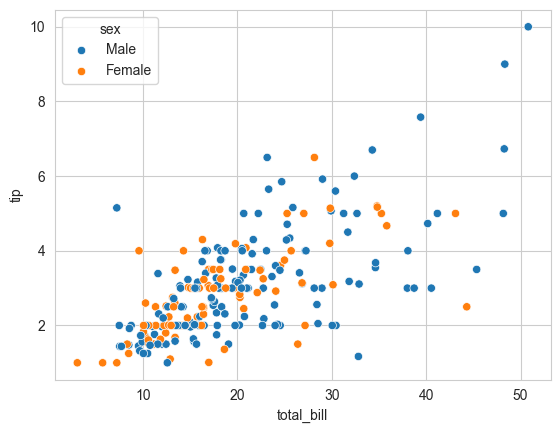

In [42]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

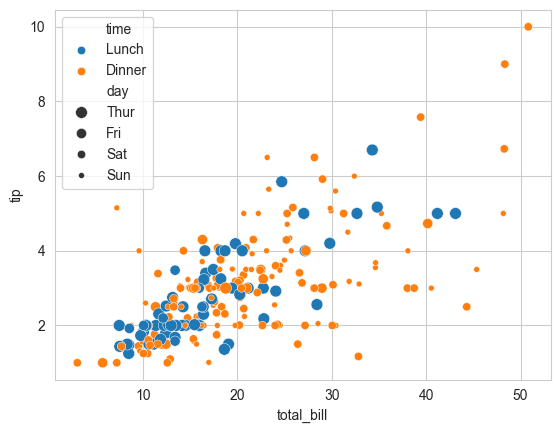

In [43]:
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='time', size='day')

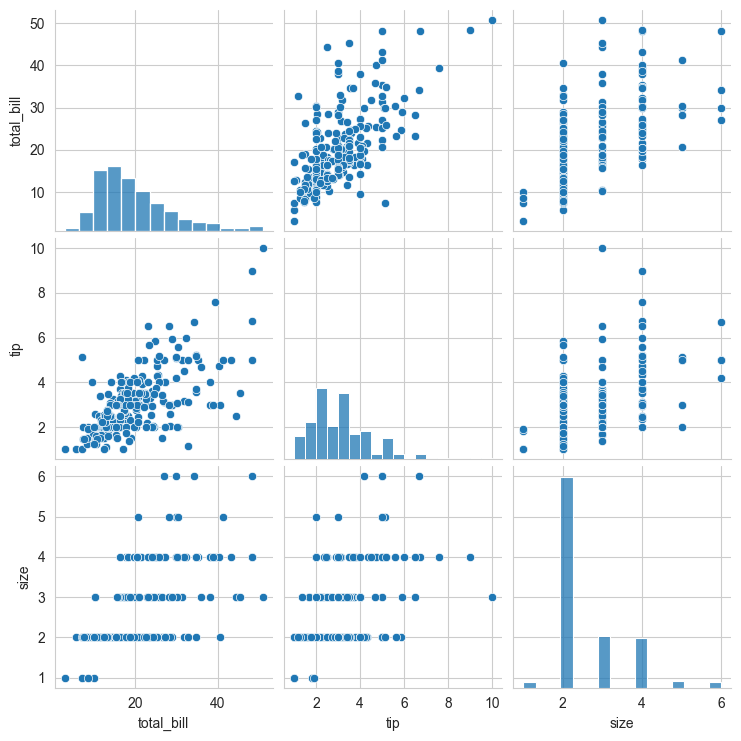

In [44]:
sns.pairplot(tips)

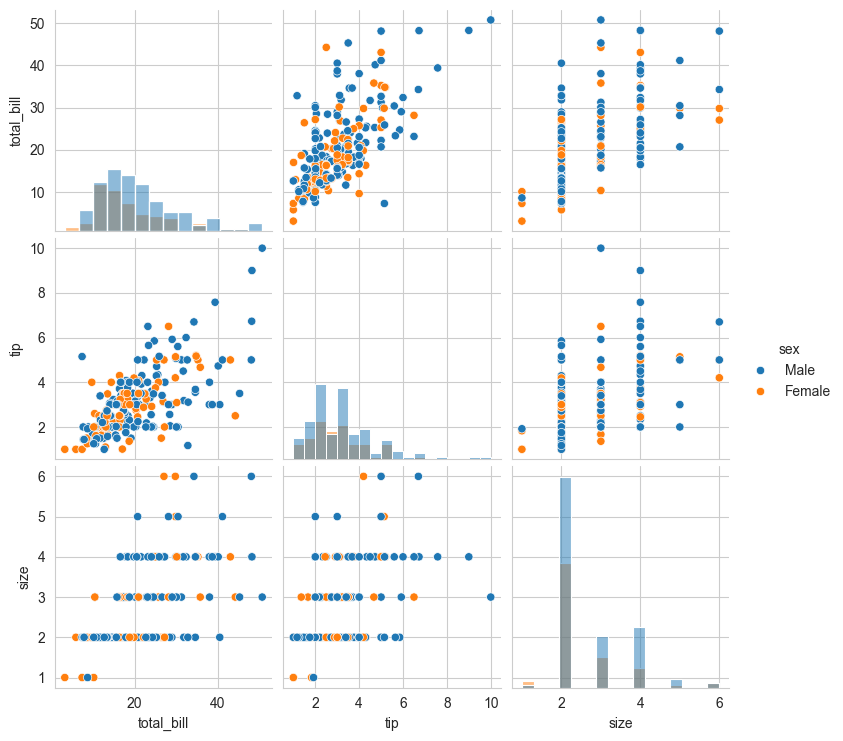

In [45]:
sns.pairplot(tips, hue='sex', diag_kind='hist')

In [19]:
sns.set_palette('tab10')

<Axes: xlabel='sex', ylabel='total_bill'>

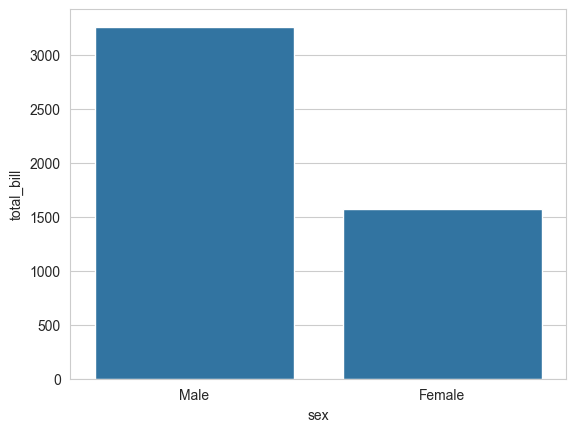

In [46]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=sum, errorbar=('ci', False))

In [47]:
sns.set_style('whitegrid')
sns.despine()

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='sex', ylabel='total_bill'>

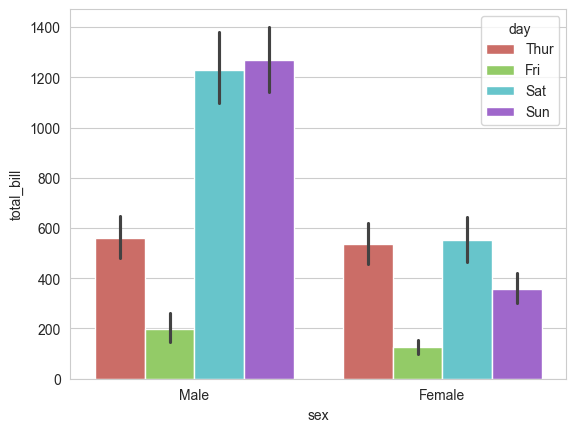

In [48]:
sns.barplot(x='sex', y='total_bill', data=tips, hue='day', estimator=sum, palette='hls')

<Axes: xlabel='sex', ylabel='count'>

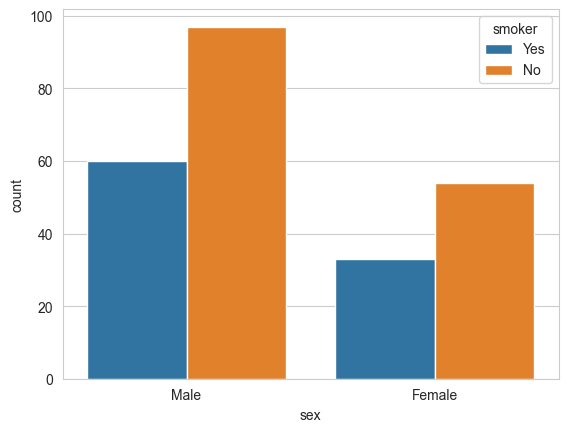

In [49]:
sns.countplot(x='sex', data=tips, hue='smoker')

<Axes: xlabel='sex', ylabel='total_bill'>

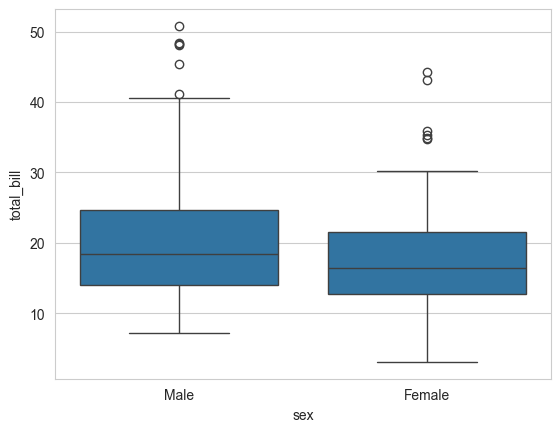

In [50]:
sns.boxplot(x='sex', y='total_bill', data=tips)

In [51]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [52]:
koreliacijos = tips.corr(numeric_only=True)
koreliacijos

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

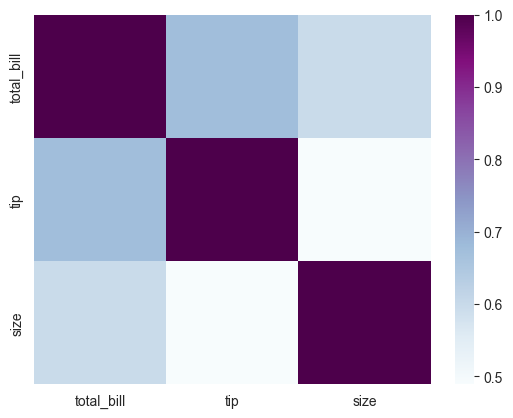

In [53]:
sns.heatmap(koreliacijos, annot=False, cmap='BuPu')

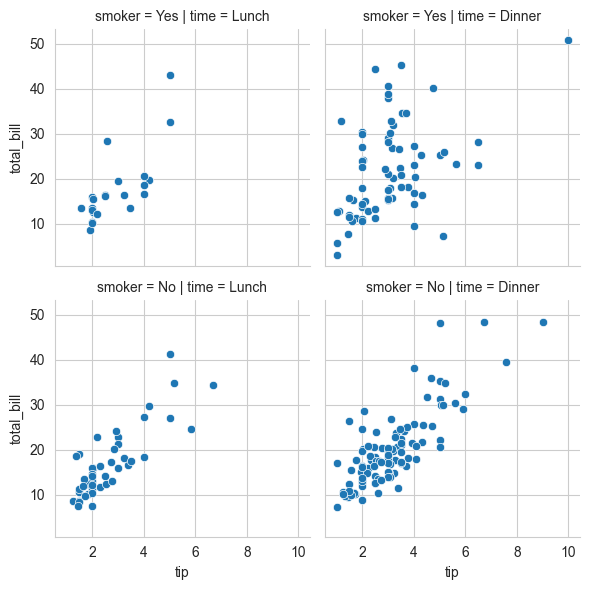

In [54]:
gridux = sns.FacetGrid(data=tips, col='time', row='smoker')
gridux.map(sns.scatterplot, 'tip', 'total_bill')